In [36]:
'''Necessary imports'''

import scipy 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#import xgboost as xgb



In [37]:
'''Reading the file, changing data-format, and inspecting dataframe'''

df = pd.read_csv('Data/NO1_Demand2022.csv') # Oslo-region
df_demand = df[["Time (CET/CEST)",'Actual Total Load [MW] - BZN|NO1']]
df_demand = df_demand.rename(columns={'Time (CET/CEST)': 'Datetime'})
df_demand['Datetime'] = pd.to_datetime(df_demand['Datetime'].str.split(' - ', expand=True)[0], format='%d.%m.%Y %H:%M')
df_demand = df_demand.set_index('Datetime')

print("="*50)
print("First Five Rows ","\n")
print(df_demand.head(),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df_demand.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df_demand.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df_demand.isnull().sum(),"\n")

First Five Rows  

                     Actual Total Load [MW] - BZN|NO1
Datetime                                             
2022-01-01 00:00:00                            4779.0
2022-01-01 01:00:00                            4701.0
2022-01-01 02:00:00                            4681.0
2022-01-01 03:00:00                            4620.0
2022-01-01 04:00:00                            4645.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8761 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 1 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Actual Total Load [MW] - BZN|NO1  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB
None 

Describe the Dataset  

       Actual Total Load [MW] - BZN|NO1
count                       8760.000000
mean                        3711.967352
std                         1174.463036
min      

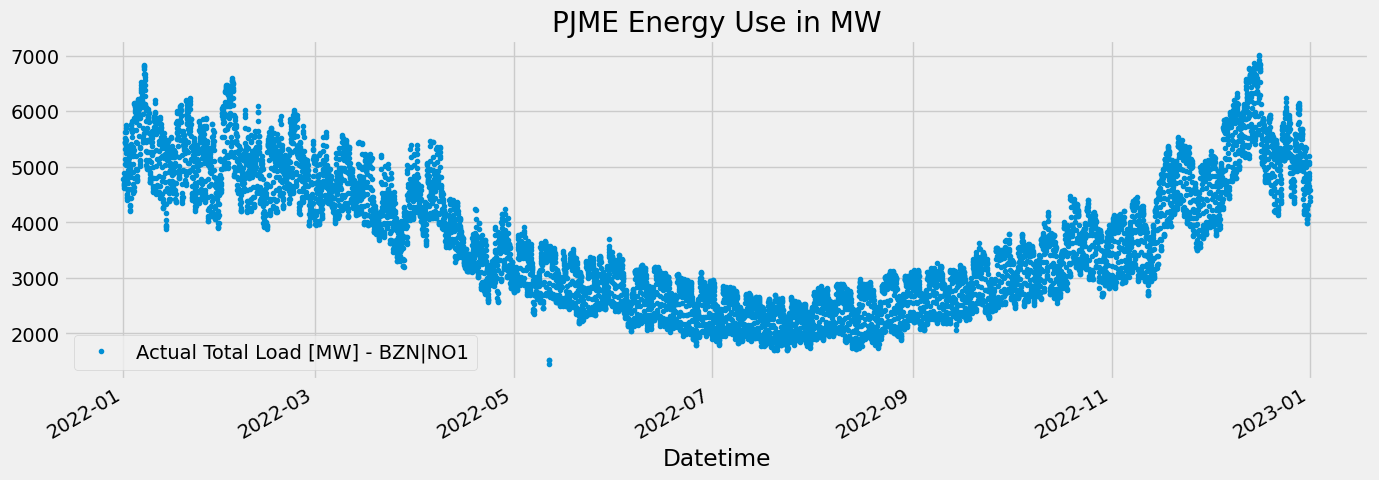

In [38]:
'''Plotting the Data'''

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

df_demand.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

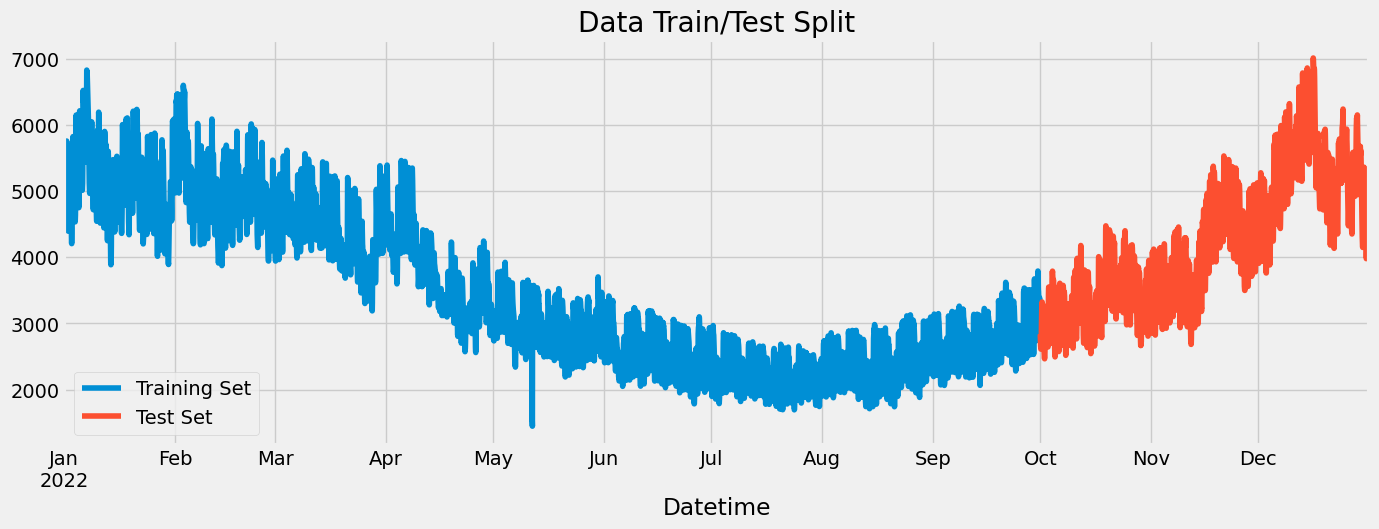

In [39]:
'''Splitting data into training and test'''

train = df_demand.loc[df_demand.index < '10-01-2022']
test = df_demand.loc[df_demand.index >= '10-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

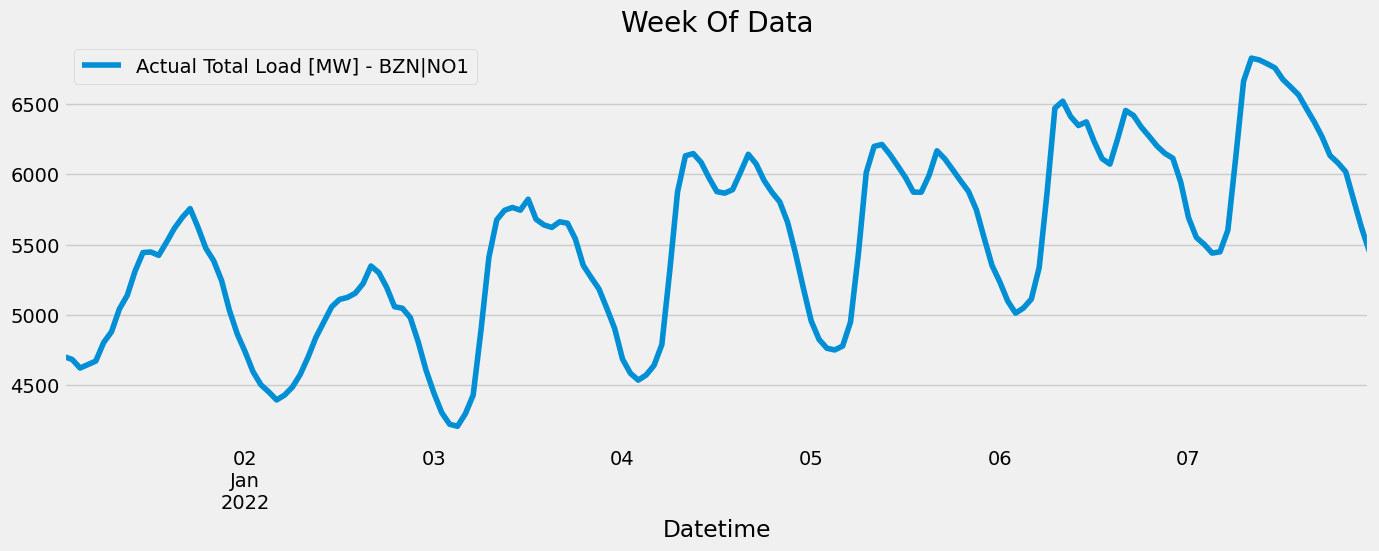

In [40]:
'''Inspecting parts of the data'''


df_demand.loc[(df_demand.index > '01-01-2022') & (df_demand.index < '01-08-2022')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [29]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
     # Sort the DataFrame by the index
    df = df.sort_index()
    return df

df_demand = create_features(df_demand)

In [31]:
df_demand.head(50)

,Actual Total Load [MW] - BZN|NO1,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2022-01-01 00:00:00,4779.0,0,5,1,1,2022,1,1,52
2022-01-01 01:00:00,4701.0,1,5,1,1,2022,1,1,52
2022-01-01 02:00:00,4681.0,2,5,1,1,2022,1,1,52
2022-01-01 03:00:00,4620.0,3,5,1,1,2022,1,1,52
2022-01-01 04:00:00,4645.0,4,5,1,1,2022,1,1,52
2022-01-01 05:00:00,4670.0,5,5,1,1,2022,1,1,52
2022-01-01 06:00:00,4802.0,6,5,1,1,2022,1,1,52
2022-01-01 07:00:00,4879.0,7,5,1,1,2022,1,1,52
2022-01-01 08:00:00,5041.0,8,5,1,1,2022,1,1,52


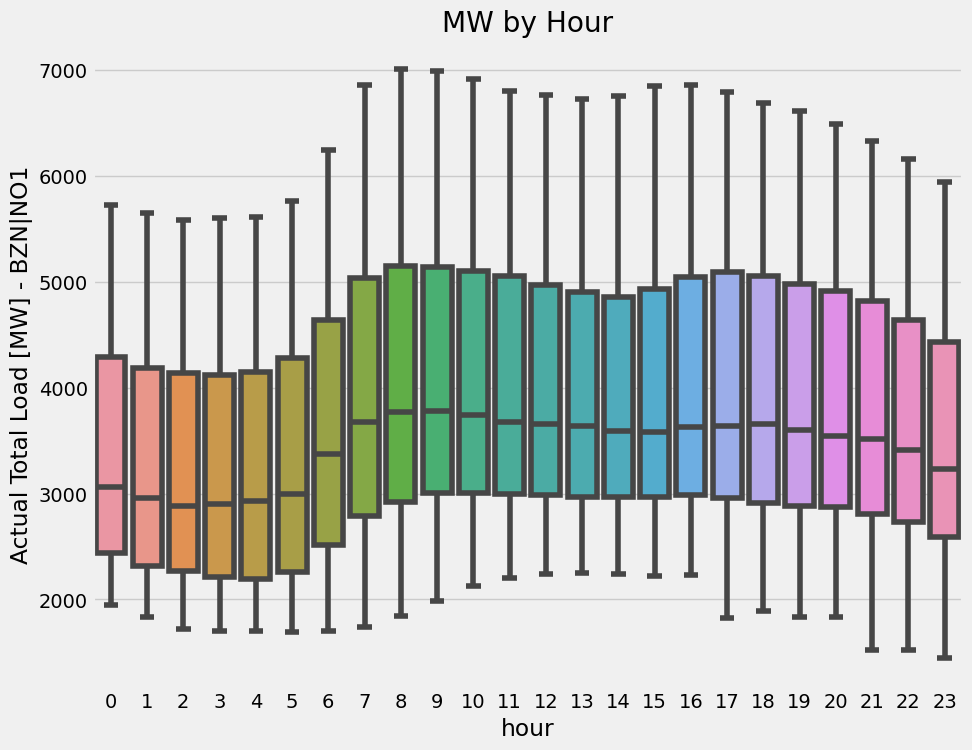

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_demand, x='hour', y='Actual Total Load [MW] - BZN|NO1')
ax.set_title('MW by Hour')
plt.show()

In [50]:


df_demand = df_demand.reshape(-1, 1)  # Reshape for scaler input

# Split the data into training and testing sets (e.g., 80% train, 20% test)
demand_train, demand_test = train_test_split(df_demand, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
demand_train = scaler.fit_transform(X_train)
demand_test = scaler.transform(X_test)



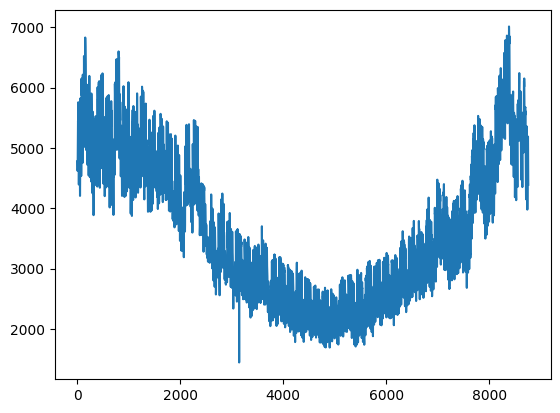

In [52]:

plt.plot(df_demand) 